In [1]:
# create the configuration of the low-fidelity model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score


from mfbml.metrics import (
    mean_log_likelihood_value,
    normalized_mae,
    normalized_rmse,
)
import torch

In [3]:
# read the data
data = pd.read_pickle("data_generation/data.pkl")
# extract dataset
samples = data["samples"]
hf_samples = samples["hf"]
lf_samples = samples["lf"]
hf_responses = data["responses_lf1"]["hf"]
responses_lf1 = data["responses_lf1"]
responses_lf2 = data["responses_lf2"]
responses_lf3 = data["responses_lf3"]
test_samples = data["test_samples"]
test_hf_responses_noiseless = data["test_hf_responses_noiseless"]
test_hf_responses = data["test_hf_responses"]
test_lf1_responses = data["test_lf1_responses"]
test_lf2_responses = data["test_lf2_responses"]
test_lf3_responses = data["test_lf3_responses"]
# normalize the responses
hf_responses_mean = hf_responses.mean().numpy()
hf_responses_std = hf_responses.std().numpy()
hf_responses_scaled = (hf_responses.clone() -
                       hf_responses_mean) / hf_responses_std

TypeError: list indices must be integers or slices, not str

In [32]:
# load the single fidelity model with 512 neurons
with open("sf_bnn_model_512_512.pkl", "rb") as f:
    bnn_512_model = torch.load(f)
# load the smf model lf1 with 50 neurons
with open("smf_bnn_lf1_50.pkl", "rb") as f:
    smf_bnn_lf1_50 = torch.load(f)

# load the smf model lf2 with 50 neurons
with open("smf_bnn_lf2_50.pkl", "rb") as f:
    smf_bnn_lf2_50 = torch.load(f)

# load the smf model lf3 with 50 neurons
with open("smf_bnn_lf3_50.pkl", "rb") as f:
    smf_bnn_lf3_50 = torch.load(f)

# load mfbnn lf1 order1 model
with open("mfdnnbnn_lf1_order_1_512_512_diff.pkl", "rb") as f:
    mfbnn_lf1_order1 = torch.load(f)

# load mfbnn lf2 order1 model
with open("mfdnnbnn_lf2_order_1_512_512_diff.pkl", "rb") as f:
    mfbnn_lf2_order1 = torch.load(f)

# load mfbnn lf3 order1 model
with open("mfdnnbnn_lf3_order_1_512_512_diff.pkl", "rb") as f:
    mfbnn_lf3_order1 = torch.load(f)

# load mfbnn lf1 order2 model
with open("mfdnnbnn_lf1_order_2_512_512_diff.pkl", "rb") as f:
    mfbnn_lf1_order2 = torch.load(f)

In [33]:
# get predictions of the models
# bnn_512
(bnn_y_512,
 bnn_epistemic_512,
 bnn_total_unc_512,
 bnn_aleatoric_512) = bnn_512_model.predict(x=test_samples)
bnn_y_512 = bnn_y_512 * hf_responses_std + hf_responses_mean
bnn_total_unc_512 = bnn_total_unc_512 * hf_responses_std
bnn_epistemic_512 = bnn_epistemic_512 * hf_responses_std
bnn_aleatoric_512 = bnn_aleatoric_512 * hf_responses_std

# smf_bnn_lf1_50 high fidelity
(smf_bnn_lf1_50_y,
 smf_bnn_lf1_50_epistemic,
 smf_bnn_lf1_50_total_unc,
 smf_bnn_lf1_50_aleatoric) = smf_bnn_lf1_50.predict(x=test_samples)

# low fidelity
smf_bnn_lf1_50_ly = smf_bnn_lf1_50.predict_lf(x=test_samples)

# smf_bnn_lf2_50 high fidelity
(smf_bnn_lf2_50_y,
 smf_bnn_lf2_50_epistemic,
 smf_bnn_lf2_50_total_unc,
 smf_bnn_lf2_50_aleatoric) = smf_bnn_lf2_50.predict(x=test_samples)

# low fidelity
smf_bnn_lf2_50_ly = smf_bnn_lf2_50.predict_lf(x=test_samples)

# smf_bnn_lf3_50 high fidelity
(smf_bnn_lf3_50_y,
 smf_bnn_lf3_50_epistemic,
 smf_bnn_lf3_50_total_unc,
 smf_bnn_lf3_50_aleatoric) = smf_bnn_lf3_50.predict(x=test_samples)

# low fidelity
smf_bnn_lf3_50_ly = smf_bnn_lf3_50.predict_lf(x=test_samples)

# for mfbnn lf1 order1
(mfbnn_lf1_order1_y,
 mfbnn_lf1_order1_epistemic,
 mfbnn_lf1_order1_total_unc,
 mfbnn_lf1_order1_aleatoric) = mfbnn_lf1_order1.predict(x=test_samples)

# low fidelity
mfbnn_lf1_order1_ly = mfbnn_lf1_order1.predict_lf(x=test_samples)

# for mfbnn lf2 order1
(mfbnn_lf2_order1_y,
 mfbnn_lf2_order1_epistemic,
 mfbnn_lf2_order1_total_unc,
 mfbnn_lf2_order1_aleatoric) = mfbnn_lf2_order1.predict(x=test_samples)

# low fidelity
mfbnn_lf2_order1_ly = mfbnn_lf2_order1.predict_lf(x=test_samples)

# for mfbnn lf3 order1
(mfbnn_lf3_order1_y,
 mfbnn_lf3_order1_epistemic,
 mfbnn_lf3_order1_total_unc,
 mfbnn_lf3_order1_aleatoric) = mfbnn_lf3_order1.predict(x=test_samples)

# low fidelity
mfbnn_lf3_order1_ly = mfbnn_lf3_order1.predict_lf(x=test_samples)

# for mfbnn lf1 order2
(mfbnn_lf1_order2_y,
 mfbnn_lf1_order2_epistemic,
 mfbnn_lf1_order2_total_unc,
 mfbnn_lf1_order2_aleatoric) = mfbnn_lf1_order2.predict(x=test_samples)

# low fidelity
mfbnn_lf1_order2_ly = mfbnn_lf1_order2.predict_lf(x=test_samples)

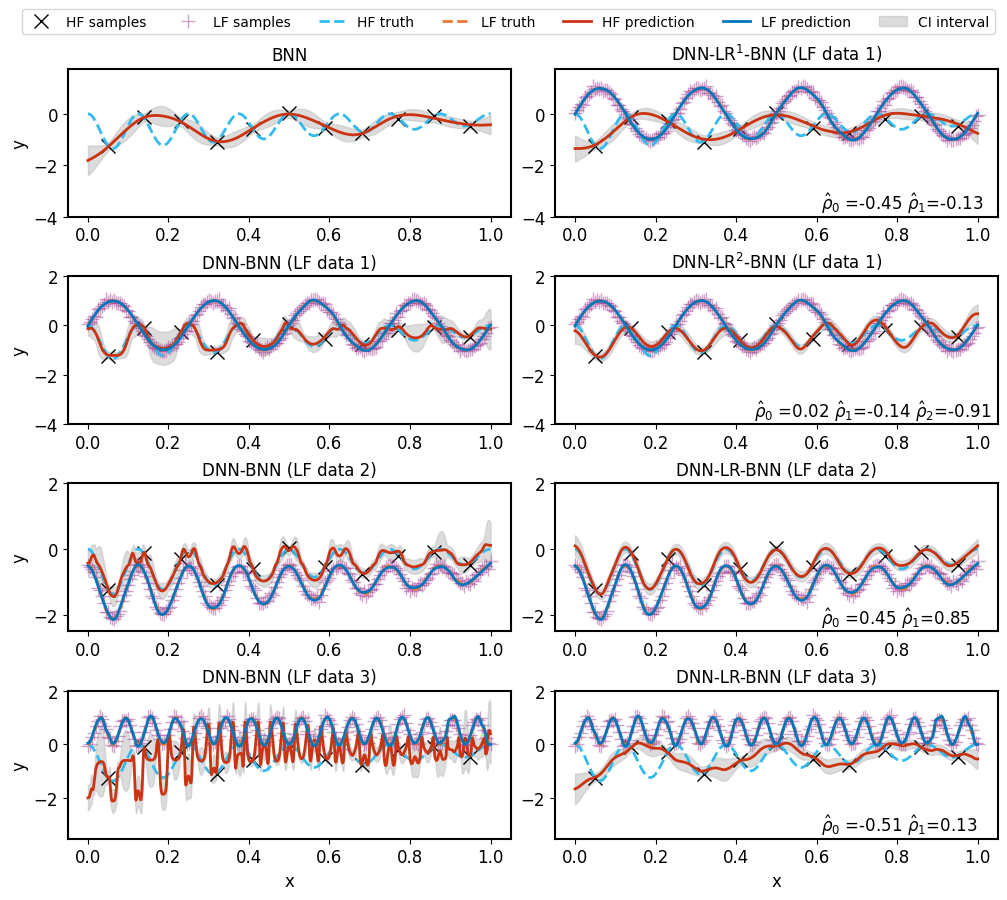

In [34]:


fig, axs = plt.subplots(4, 2, figsize=(12, 10))
# plot the prediction of bnn
axs[0, 0].plot(hf_samples, hf_responses, "kx",
               linewidth=2,
               markersize=10, label="HF samples")
axs[0, 0].plot(
    test_samples.numpy(),
    test_hf_responses_noiseless.numpy(),
    "--",
    color="#33BBEE",
    linewidth=2,
    label="HF truth",
)

axs[0, 0].plot(test_samples.numpy(),
               bnn_y_512,
               "-",
               color="#CC3311",
               linewidth=2,
               label="HF prediction",)

axs[0, 0].fill_between(
    test_samples.flatten().numpy(),
    (bnn_y_512 - 2 * bnn_total_unc_512).reshape(-1),
    (bnn_y_512 + 2 * bnn_total_unc_512).reshape(-1),
    alpha=0.5,
    color="#BBBBBB",
    label="CI interval",
)
# axs[0, 0].legend()
axs[0, 0].set_title("BNN")

# plot the prediction of mf-dnn-bnn on lf1 with order1
axs[0, 1].plot(hf_samples, hf_responses, "kx", linewidth=2,
               markersize=10,
               label="HF samples",)
axs[0, 1].plot(lf_samples, responses_lf1['lf'],
               "+", color="#AA4499", linewidth=2,
               markersize=10,
               alpha=0.5,
               label="LF samples",)
axs[0, 1].plot(
    test_samples.numpy(),
    test_hf_responses_noiseless.numpy(),
    "--",
    color="#33BBEE",
    linewidth=2,
    label="HF truth",
)
# plot the lf truth
axs[0, 1].plot(
    test_samples.numpy(),
    test_lf1_responses.numpy(),
    "--", color="#EE7733",
    linewidth=2,
    label="LF truth",
)

axs[0, 1].plot(test_samples.numpy(),
               mfbnn_lf1_order1_y,  "-",
               color="#CC3311",
               linewidth=2,
               label="HF prediction",)
axs[0, 1].plot(
    test_samples.numpy(),
    mfbnn_lf1_order1_ly.detach().numpy(),
    "-", color="#0077BB",
    linewidth=2,
    label="LF prediction",
)
axs[0, 1].fill_between(
    test_samples.flatten().numpy(),
    (mfbnn_lf1_order1_y - 2 * mfbnn_lf1_order1_total_unc).reshape(-1),
    (mfbnn_lf1_order1_y + 2 * mfbnn_lf1_order1_total_unc).reshape(-1),
    alpha=0.5,
    color="#BBBBBB",
    label="CI interval",
)

# axs[0, 1].legend()
axs[0, 1].set_title(r"DNN-LR$^1$-BNN (LF data 1)")


# plot the prediction of sequential mf-bnn on lf1
axs[1, 0].plot(hf_samples, hf_responses,
               "kx", linewidth=2,
               markersize=10,
               label="HF samples",)
axs[1, 0].plot(lf_samples, responses_lf1['lf'].numpy(),  '+',
               color="#AA4499",
               linewidth=2,
               markersize=10,
               alpha=0.5,
               label="LF samples",)
axs[1, 0].plot(
    test_samples.numpy(),
    test_hf_responses_noiseless.numpy(),
    "--",
    color="#33BBEE",
    linewidth=2,
    label="HF truth",
)
axs[1, 0].plot(test_samples.numpy(), smf_bnn_lf1_50_y,
               "-", color="#CC3311",
               linewidth=2,
               label="HF prediction",)
# plot the lf truth
axs[1, 0].plot(
    test_samples.numpy(),
    test_lf1_responses.numpy(),
    "--", color="#EE7733",
    linewidth=2,
    label="LF truth",
)
#
axs[1, 0].plot(
    test_samples.numpy(),
    smf_bnn_lf1_50_ly.detach().numpy(),
    "-",
    color="#0077BB",
    linewidth=2,

    label="LF prediction"
)
axs[1, 0].fill_between(
    test_samples.flatten().numpy(),
    (smf_bnn_lf1_50_y - 2 * smf_bnn_lf1_50_total_unc).reshape(-1),
    (smf_bnn_lf1_50_y + 2 * smf_bnn_lf1_50_total_unc).reshape(-1),
    alpha=0.5,
    color="#BBBBBB",
    label="CI interval",
)

# axs[1, 0].legend()
axs[1, 0].set_title("DNN-BNN (LF data 1)")


# plot the prediction of mf-dnn-bnn on lf1
axs[1, 1].plot(hf_samples, hf_responses, "kx",
               linewidth=2,
               markersize=10,
               label="HF samples")
axs[1, 1].plot(lf_samples, responses_lf1['lf'].numpy(),
               '+', color="#AA4499", linewidth=2,
               markersize=10,
               alpha=0.5,
               label="LF samples")
axs[1, 1].plot(
    test_samples.numpy(),
    test_hf_responses_noiseless.numpy(),
    "--",
    color="#33BBEE",
    linewidth=2,
    label="HF truth",
)
# with lf order 2
axs[1, 1].plot(test_samples.numpy(), mfbnn_lf1_order2_y,
               "-", color="#CC3311",
               linewidth=2,
               label="HF prediction")
# plot the lf truth
axs[1, 1].plot(
    test_samples.numpy(),
    test_lf1_responses.numpy(),
    "--", color="#EE7733",
    linewidth=2,
    label="LF truth",
)

axs[1, 1].plot(
    test_samples.numpy(),
    mfbnn_lf1_order2_ly.detach().numpy(),
    "-",
    color="#0077BB",
    linewidth=2,
    label="LF prediction"
)
# with lf order 2
axs[1, 1].fill_between(
    test_samples.flatten().numpy(),
    (mfbnn_lf1_order2_y - 2 * mfbnn_lf1_order2_total_unc).reshape(-1),
    (mfbnn_lf1_order2_y + 2 * mfbnn_lf1_order2_total_unc).reshape(-1),
    alpha=0.5,
    color="#BBBBBB",
    label="CI interval",
)

# axs[1, 1].legend()
axs[1, 1].set_title(r"DNN-LR$^2$-BNN (LF data 1)")
# plot the prediction of sequential mf-bnn on lf2
axs[2, 0].plot(hf_samples, hf_responses,
               "kx", linewidth=2,
               markersize=10,
               label="HF samples",)
axs[2, 0].plot(lf_samples, responses_lf2['lf'].numpy(),
               '+', color="#AA4499", linewidth=2,
               markersize=10,
               alpha=0.5,
               label="LF samples")
axs[2, 0].plot(
    test_samples.numpy(),
    test_hf_responses_noiseless.numpy(),
    "--",
    color="#33BBEE",
    linewidth=2,
    label="HF truth",
)


axs[2, 0].plot(test_samples.numpy(), smf_bnn_lf2_50_y,
               "-", color="#CC3311",
               linewidth=2,
               label="HF prediction",)
# plot the lf truth
axs[2, 0].plot(
    test_samples.numpy(),
    test_lf2_responses.numpy(),
    "--", color="#EE7733",
    linewidth=2,
    label="LF truth",
)

axs[2, 0].plot(
    test_samples.numpy(),
    smf_bnn_lf2_50_ly.detach().numpy(),
    "-",
    color="#0077BB",
    linewidth=2,
    label="LF prediction"
)
axs[2, 0].fill_between(
    test_samples.flatten().numpy(),
    (smf_bnn_lf2_50_y - 2 * smf_bnn_lf2_50_total_unc).reshape(-1),
    (smf_bnn_lf2_50_y + 2 * smf_bnn_lf2_50_total_unc).reshape(-1),
    alpha=0.5,
    color="#BBBBBB",
    label="CI interval",

)
# axs[2, 0].legend()
axs[2, 0].set_title("DNN-BNN (LF data 2)")

# plot the prediction of mf-dnn-bnn on lf2
axs[2, 1].plot(hf_samples, hf_responses,
               "kx", linewidth=2,
               markersize=10,
               label="HF samples")
axs[2, 1].plot(lf_samples, responses_lf2['lf'].numpy(),
               '+', color="#AA4499", linewidth=2,
               markersize=10,
               alpha=0.5,
               label="LF samples")
axs[2, 1].plot(
    test_samples.numpy(),
    test_hf_responses_noiseless.numpy(),
    "--",
    color="#33BBEE",
    linewidth=2,
    label="HF truth",
)

axs[2, 1].plot(test_samples.numpy(), mfbnn_lf2_order1_y,
               "-", color="#CC3311",
               linewidth=2,
               label="HF prediction")
# plot the lf truth
axs[2, 1].plot(
    test_samples.numpy(),
    test_lf2_responses.numpy(),
    "--", color="#EE7733",
    linewidth=2,
    label="LF truth",
)
# plot the lf prediction
axs[2, 1].plot(
    test_samples.numpy(),
    mfbnn_lf2_order1_ly.detach().numpy(),
    "-",
    color="#0077BB",
    linewidth=2,
    label="LF prediction"
)
# plot the uncertainty
axs[2, 1].fill_between(
    test_samples.flatten().numpy(),
    (mfbnn_lf2_order1_y - 2 * mfbnn_lf2_order1_total_unc).reshape(-1),
    (mfbnn_lf2_order1_y + 2 * mfbnn_lf2_order1_total_unc).reshape(-1),
    alpha=0.5,
    color="#BBBBBB",
    label="CI interval"
)

# axs[2, 1].legend()
axs[2, 1].set_title("DNN-LR-BNN (LF data 2)")
# plot the prediction of sequential mf-bnn on lf3
axs[3, 0].plot(hf_samples, hf_responses,
               'kx', linewidth=2,
               markersize=10,
               label="HF samples")
axs[3, 0].plot(lf_samples, responses_lf3['lf'].numpy(),
               '+', color="#AA4499", linewidth=2,
               markersize=10,
               alpha=0.5,
               label="LF samples")
axs[3, 0].plot(
    test_samples.numpy(),
    test_hf_responses_noiseless.numpy(),
    "--",
    color="#33BBEE",
    linewidth=2,
    label="HF truth",
)
axs[3, 0].plot(test_samples.numpy(), smf_bnn_lf3_50_y,
               "-", color="#CC3311",
               linewidth=2,
               label="HF prediction")

# plot the lf truth
axs[3, 0].plot(
    test_samples.numpy(),
    test_lf3_responses.numpy(),
    "--", color="#EE7733",
    linewidth=2,
    label="LF truth",
)

axs[3, 0].plot(
    test_samples.numpy(),
    smf_bnn_lf3_50_ly.detach().numpy(),
    "-",
    color="#0077BB",
    linewidth=2,
    label="LF prediction"

)

axs[3, 0].fill_between(
    test_samples.flatten().numpy(),
    (smf_bnn_lf3_50_y - 2 * smf_bnn_lf3_50_total_unc).reshape(-1),
    (smf_bnn_lf3_50_y + 2 * smf_bnn_lf3_50_total_unc).reshape(-1),
    alpha=0.5,
    color="#BBBBBB",
    label="CI interval",
)
# axs[3, 0].legend()
axs[3, 0].set_title("DNN-BNN (LF data 3)")

# plot the prediction of mf-dnn-bnn on lf3
axs[3, 1].plot(hf_samples, hf_responses,
               "kx", linewidth=2,
               markersize=10,
               label="HF samples")
axs[3, 1].plot(lf_samples, responses_lf3['lf'].numpy(),
               '+', color="#AA4499", linewidth=2,
               markersize=10,
               alpha=0.5,
               label="LF samples")
axs[3, 1].plot(
    test_samples.numpy(),
    test_hf_responses_noiseless.numpy(),
    "--",
    color="#33BBEE",
    linewidth=2,
    label="HF truth",
)
axs[3, 1].plot(test_samples.numpy(), mfbnn_lf3_order1_y,
               "-", color="#CC3311",
               linewidth=2,
               label="HF prediction")


# plot the lf truth
axs[3, 1].plot(
    test_samples.numpy(),
    test_lf3_responses.numpy(),
    "--", color="#EE7733",
    linewidth=2,
    label="LF truth",
)
axs[3, 1].plot(
    test_samples.numpy(),
    smf_bnn_lf3_50_ly.detach().numpy(),
    "-",
    color="#0077BB",
    linewidth=2,
    label="LF prediction"
)
axs[3, 1].fill_between(
    test_samples.flatten().numpy(),
    (mfbnn_lf3_order1_y - 2 * mfbnn_lf3_order1_total_unc).reshape(-1),
    (mfbnn_lf3_order1_y + 2 * mfbnn_lf3_order1_total_unc).reshape(-1),
    alpha=0.5,
    color="#BBBBBB",
    label="CI interval",

)
# axs[3, 1].legend()
axs[3, 1].set_title("DNN-LR-BNN (LF data 3)")
# set the axis labels x for the bottom row and y for the left column
for ii in range(4):
    for jj in range(2):
        if ii == 3:
            axs[ii, jj].set_xlabel("x", fontsize=12)
        if jj == 0:
            axs[ii, jj].set_ylabel("y", fontsize=12)
# set the line width of the axes
for ii in range(4):
    for jj in range(2):
        axs[ii, jj].spines["top"].set_linewidth(1.5)
        axs[ii, jj].spines["right"].set_linewidth(1.5)
        axs[ii, jj].spines["left"].set_linewidth(1.5)
        axs[ii, jj].spines["bottom"].set_linewidth(1.5)
        # font size of the axis
        axs[ii, jj].tick_params(axis="both", which="major", labelsize=12)

# set the limit of y for each row

for jj in range(2):
    axs[0, jj].set_ylim([-4, 1.75])
    axs[1, jj].set_ylim([-4, 2])
    axs[2, jj].set_ylim([-2.5, 2])
    axs[3, jj].set_ylim([-3.5, 2])
# set legende for the first subfigure  and put it outside the figure
axs[0, 1].legend(loc='upper left', bbox_to_anchor=(-1.22, 1.45), fontsize=10,
                 frameon=True, ncol=7)

# add beta values to the right subfigures
axs[0, 1].text(0.6, 0.05, r"$ \hat \rho_0$ ={:0.2f} $\hat \rho_1$={:0.2f}" .format(
    mfbnn_lf1_order1.beta[0].item(), mfbnn_lf1_order1.beta[1].item()),
    fontsize=12,
    transform=axs[0, 1].transAxes)
axs[1, 1].text(0.45, 0.05, r"$ \hat \rho_0$ ={:0.2f} $\hat \rho_1$={:0.2f} $\hat \rho_2$={:0.2f}" .format(
    mfbnn_lf1_order2.beta[0].item(), mfbnn_lf1_order2.beta[1].item(), mfbnn_lf1_order2.beta[2].item()),
    fontsize=12,
    transform=axs[1, 1].transAxes)
axs[2, 1].text(0.6, 0.05, r"$ \hat \rho_0$ ={:0.2f} $\hat \rho_1$={:0.2f}" .format(
    mfbnn_lf2_order1.beta[0].item(), mfbnn_lf2_order1.beta[1].item()),
    fontsize=12,
    transform=axs[2, 1].transAxes)
axs[3, 1].text(0.6, 0.05, r"$ \hat \rho_0$ ={:0.2f} $\hat \rho_1$={:0.2f}" .format(
    mfbnn_lf3_order1.beta[0].item(), mfbnn_lf3_order1.beta[1].item()),
    fontsize=12,
    transform=axs[3, 1].transAxes)

# space of sub-figures
plt.subplots_adjust(wspace=0.1, hspace=0.4)
# save
# plt.savefig("mf_dnn_bnn_known_noise.pdf", bbox_inches="tight", dpi=300)
# plt.savefig("mf_dnn_bnn_known_noise.png", bbox_inches="tight", dpi=300)
# plt.savefig("mf_dnn_bnn_known_noise.svg", bbox_inches="tight", dpi=300)
plt.show()

In [35]:
# evaluate the models on the accuracy metrics
# bnn model
# calculate the mse
import pandas as pd
bnn_mse = normalized_rmse(
    test_hf_responses_noiseless.numpy(), bnn_y_512)
bnn_nmae = normalized_mae(
    test_hf_responses_noiseless.numpy(), bnn_y_512)
bnn_nll = mean_log_likelihood_value(
    test_hf_responses_noiseless.numpy(), bnn_y_512, bnn_total_unc_512)
bnn_r2 = r2_score(
    test_hf_responses_noiseless.numpy(), bnn_y_512)
# print the results
print("BNN model")
print(f"Normalized RMSE: {bnn_mse}")
print(f"Normalized MAE: {bnn_nmae}")
print(f"Normalized Log Likelihood: {bnn_nll}")
print(f"R2: {bnn_r2}")

# sequential mf-bnn on lf1
# calculate the mse
smf_bnn_lf1_mse = normalized_rmse(
    test_hf_responses_noiseless.numpy(), smf_bnn_lf1_50_y)
smf_bnn_lf1_nmae = normalized_mae(
    test_hf_responses_noiseless.numpy(), smf_bnn_lf1_50_y)
smf_bnn_lf1_nll = mean_log_likelihood_value(
    test_hf_responses_noiseless.numpy(), smf_bnn_lf1_50_y, smf_bnn_lf1_50_total_unc)
smf_bnn_lf1_r2 = r2_score(
    test_hf_responses_noiseless.numpy(), smf_bnn_lf1_50_y)
# print the results
print("Sequential MF-BNN on LF1")
print(f"Normalized RMSE: {smf_bnn_lf1_mse}")
print(f"Normalized MAE: {smf_bnn_lf1_nmae}")
print(f"Normalized Log Likelihood: {smf_bnn_lf1_nll}")
print(f"R2: {smf_bnn_lf1_r2}")

# mf-dnn-bnn on lf1
# calculate the mse
mfdnnbnn_lf1_mse = normalized_rmse(
    test_hf_responses_noiseless.numpy(), mfbnn_lf1_order1_y)
mfdnnbnn_lf1_nmae = normalized_mae(
    test_hf_responses_noiseless.numpy(), mfbnn_lf1_order1_y)
mfdnnbnn_lf1_nll = mean_log_likelihood_value(
    test_hf_responses_noiseless.numpy(), mfbnn_lf1_order1_y, mfbnn_lf1_order1_total_unc)
mfdnnbnn_lf1_r2 = r2_score(
    test_hf_responses_noiseless.numpy(), mfbnn_lf1_order1_y)
# print the results
print("MF-DNN-BNN on LF1")
print(f"Normalized RMSE: {mfdnnbnn_lf1_mse}")
print(f"Normalized MAE: {mfdnnbnn_lf1_nmae}")
print(f"Normalized Log Likelihood: {mfdnnbnn_lf1_nll}")

# mf-dnn-bnn on lf1 with order 2
# calculate the mse
mfdnnbnn_lf1_order_2_mse = normalized_rmse(
    test_hf_responses_noiseless.numpy(), mfbnn_lf1_order2_y)
mfdnnbnn_lf1_order_2_nmae = normalized_mae(
    test_hf_responses_noiseless.numpy(), mfbnn_lf1_order2_y)
mfdnnbnn_lf1_order_2_nll = mean_log_likelihood_value(
    test_hf_responses_noiseless.numpy(), mfbnn_lf1_order2_y, mfbnn_lf1_order2_total_unc)
mfdnnbnn_lf1_order_2_r2 = r2_score(
    test_hf_responses_noiseless.numpy(), mfbnn_lf1_order2_y)
# print the results
print("MF-DNN-BNN on LF1 with order 2")
print(f"Normalized RMSE: {mfdnnbnn_lf1_order_2_mse}")
print(f"Normalized MAE: {mfdnnbnn_lf1_order_2_nmae}")
print(f"Normalized Log Likelihood: {mfdnnbnn_lf1_order_2_nll}")
print(f"R2: {mfdnnbnn_lf1_order_2_r2}")


# sequential mf-bnn on lf2
# calculate the mse
smf_bnn_lf2_mse = normalized_rmse(
    test_hf_responses_noiseless.numpy(), smf_bnn_lf2_50_y)
smf_bnn_lf2_nmae = normalized_mae(
    test_hf_responses_noiseless.numpy(), smf_bnn_lf2_50_y)
smf_bnn_lf2_nll = mean_log_likelihood_value(
    test_hf_responses_noiseless.numpy(), smf_bnn_lf2_50_y, smf_bnn_lf2_50_total_unc)
smf_bnn_lf2_r2 = r2_score(
    test_hf_responses_noiseless.numpy(), smf_bnn_lf2_50_y)
# print the results
print("Sequential MF-BNN on LF2")
print(f"Normalized RMSE: {smf_bnn_lf2_mse}")
print(f"Normalized MAE: {smf_bnn_lf2_nmae}")
print(f"Normalized Log Likelihood: {smf_bnn_lf2_nll}")
print(f"R2: {smf_bnn_lf2_r2}")

# mf-dnn-bnn on lf2
# calculate the mse
mfdnnbnn_lf2_mse = normalized_rmse(
    test_hf_responses_noiseless.numpy(), mfbnn_lf2_order1_y)
mfdnnbnn_lf2_nmae = normalized_mae(
    test_hf_responses_noiseless.numpy(), mfbnn_lf2_order1_y)
mfdnnbnn_lf2_nll = mean_log_likelihood_value(
    test_hf_responses_noiseless.numpy(), mfbnn_lf2_order1_y, mfbnn_lf2_order1_total_unc)
mfdnnbnn_lf2_r2 = r2_score(
    test_hf_responses_noiseless.numpy(), mfbnn_lf2_order1_y)
# print the results
print("MF-DNN-BNN on LF2")
print(f"Normalized RMSE: {mfdnnbnn_lf2_mse}")
print(f"Normalized MAE: {mfdnnbnn_lf2_nmae}")
print(f"Normalized Log Likelihood: {mfdnnbnn_lf2_nll}")
print(f"R2: {mfdnnbnn_lf2_r2}")

# sequential mf-bnn on lf3
# calculate the mse
smf_bnn_lf3_mse = normalized_rmse(
    test_hf_responses_noiseless.numpy(), smf_bnn_lf3_50_y)
smf_bnn_lf3_nmae = normalized_mae(
    test_hf_responses_noiseless.numpy(), smf_bnn_lf3_50_y)
smf_bnn_lf3_nll = mean_log_likelihood_value(
    test_hf_responses_noiseless.numpy(), smf_bnn_lf3_50_y, smf_bnn_lf3_50_total_unc)
smf_bnn_lf3_r2 = r2_score(
    test_hf_responses_noiseless.numpy(), smf_bnn_lf3_50_y)

# print the results
print("Sequential MF-BNN on LF3")
print(f"Normalized RMSE: {smf_bnn_lf3_mse}")
print(f"Normalized MAE: {smf_bnn_lf3_nmae}")
print(f"Normalized Log Likelihood: {smf_bnn_lf3_nll}")
print(f"R2: {smf_bnn_lf3_r2}")

# mf-dnn-bnn on lf3
# calculate the mse
mfdnnbnn_lf3_mse = normalized_rmse(
    test_hf_responses_noiseless.numpy(), mfbnn_lf3_order1_y)
mfdnnbnn_lf3_nmae = normalized_mae(
    test_hf_responses_noiseless.numpy(), mfbnn_lf3_order1_y)
mfdnnbnn_lf3_nll = mean_log_likelihood_value(
    test_hf_responses_noiseless.numpy(), mfbnn_lf3_order1_y, mfbnn_lf3_order1_total_unc)
mfdnnbnn_lf3_r2 = r2_score(
    test_hf_responses_noiseless.numpy(), mfbnn_lf3_order1_y)
# print the results
print("MF-DNN-BNN on LF3")
print(f"Normalized RMSE: {mfdnnbnn_lf3_mse}")
print(f"Normalized MAE: {mfdnnbnn_lf3_nmae}")
print(f"Normalized Log Likelihood: {mfdnnbnn_lf3_nll}")
print(f"R2: {mfdnnbnn_lf3_r2}")

# save the results in pandas dataframe
results = {
    "Model": ["BNN", "Sequential MF-BNN LF1", "MF-DNN-BNN LF1",
              "MF-DNN-BNN LF1 Order 2", "Sequential MF-BNN LF2",
              "MF-DNN-BNN LF2", "Sequential MF-BNN LF3", "MF-DNN-BNN LF3"],
    "Normalized RMSE": [bnn_mse, smf_bnn_lf1_mse, mfdnnbnn_lf1_mse,
                        mfdnnbnn_lf1_order_2_mse, smf_bnn_lf2_mse,
                        mfdnnbnn_lf2_mse, smf_bnn_lf3_mse, mfdnnbnn_lf3_mse],
    "Normalized MAE": [bnn_nmae, smf_bnn_lf1_nmae, mfdnnbnn_lf1_nmae,
                       mfdnnbnn_lf1_order_2_nmae, smf_bnn_lf2_nmae,
                       mfdnnbnn_lf2_nmae, smf_bnn_lf3_nmae, mfdnnbnn_lf3_nmae],
    "Normalized Log Likelihood": [bnn_nll, smf_bnn_lf1_nll, mfdnnbnn_lf1_nll,
                                  mfdnnbnn_lf1_order_2_nll, smf_bnn_lf2_nll,
                                  mfdnnbnn_lf2_nll, smf_bnn_lf3_nll, mfdnnbnn_lf3_nll],
    "R2": [bnn_r2, smf_bnn_lf1_r2, mfdnnbnn_lf1_r2,
           mfdnnbnn_lf1_order_2_r2, smf_bnn_lf2_r2,
           mfdnnbnn_lf2_r2, smf_bnn_lf3_r2, mfdnnbnn_lf3_r2],
}
results_df = pd.DataFrame(results)
print(results_df)
# save the results
results_df.to_csv("results_new.csv", index=False)

BNN model
Normalized RMSE: 1.0924787521362305
Normalized MAE: 3.969078779220581
Normalized Log Likelihood: -4.535890102386475
R2: -0.8377755481589466
Sequential MF-BNN on LF1
Normalized RMSE: 0.2101961374282837
Normalized MAE: 0.6622942090034485
Normalized Log Likelihood: 0.798259973526001
R2: 0.9319675743531656
MF-DNN-BNN on LF1
Normalized RMSE: 1.0431181192398071
Normalized MAE: 2.956042528152466
Normalized Log Likelihood: -7.703216075897217
MF-DNN-BNN on LF1 with order 2
Normalized RMSE: 0.3196505904197693
Normalized MAE: 1.0322610139846802
Normalized Log Likelihood: 0.4925599694252014
R2: 0.8426678240242933
Sequential MF-BNN on LF2
Normalized RMSE: 0.223484069108963
Normalized MAE: 0.9363329410552979
Normalized Log Likelihood: 1.0006567239761353
R2: 0.92309410651153
MF-DNN-BNN on LF2
Normalized RMSE: 0.08548837155103683
Normalized MAE: 0.2251775860786438
Normalized Log Likelihood: 1.4982492923736572
R2: 0.9887466828259911
Sequential MF-BNN on LF3
Normalized RMSE: 1.39337158203125
N

In [36]:
results_df

,Model,Normalized RMSE,Normalized MAE,Normalized Log Likelihood,R2
0,BNN,1.092479,3.969079,-4.535890,-0.837776
1,Sequential MF-BNN LF1,0.210196,0.662294,0.798260,0.931968
2,MF-DNN-BNN LF1,1.043118,2.956043,-7.703216,-0.675458
3,MF-DNN-BNN LF1 Order 2,0.319651,1.032261,0.492560,0.842668
4,Sequential MF-BNN LF2,0.223484,0.936333,1.000657,0.923094
5,MF-DNN-BNN LF2,0.085488,0.225178,1.498249,0.988747
6,Sequential MF-BNN LF3,1.393372,4.473453,-4.705945,-1.989512
7,MF-DNN-BNN LF3,1.060787,3.610030,-5.113898,-0.732697
